1. Importing all the necesssary libraries required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

In [2]:
from IPython.display import display
# Reading the dataset extracted from the Kaggle
cardio_disease = pd.read_csv("cardio_train.csv" , delimiter = ';')

# viewing the head and tail of the cardio disease dataset #
display(cardio_disease.head(5))
cardio_disease.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [3]:
# info of the dataset
cardio_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


 |col_description | feature | col_name | datatype |
|----------------|---------|----------|----------|
Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All the binary values (0, 1) are considered as:  
    Yes : 1  
    No  : 0  
#Description of the column names of the cardio_disease dataset  
Total number of rows it has is : 70000  
Number of columns is : 13  

# Exploratory data Analysis 

% of people having cardio disease: 49.97
% of people not having cardio disease: 50.029999999999994


<function matplotlib.pyplot.show(close=None, block=None)>

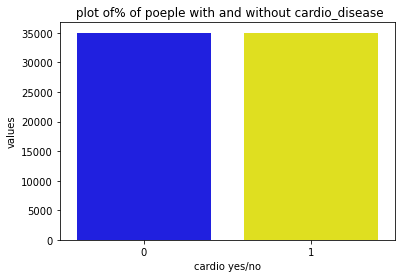

In [4]:
# Checking how much % of the people are suffering with cardio disease and how many people are not suffering with it
cardio_yes = sum(cardio_disease['cardio'] == 1)/ len(cardio_disease)*100 
cardio_no  =  sum(cardio_disease['cardio'] == 0)/len(cardio_disease)*100
print("% of people having cardio disease:",cardio_yes)
print("% of people not having cardio disease:", cardio_no )
# visualizing the same
sns.countplot(data = cardio_disease, x = 'cardio', palette= {0 : 'blue', 1: 'yellow'})
plt.title(" plot of% of poeple with and without cardio_disease")
plt.xlabel("cardio yes/no")
plt.ylabel("values")
plt.show

In [5]:
#checking for null values or missing values :
cardio_disease_columns = cardio_disease.columns.tolist()
print(cardio_disease_columns)
for col in cardio_disease_columns:
    i = 0
    for j in range(0, len(cardio_disease)):
        if pd.isnull(cardio_disease.iloc[j][col]) == True:
            i += 1
    print("Null values for", col, "is", i )

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
Null values for id is 0
Null values for age is 0
Null values for gender is 0
Null values for height is 0
Null values for weight is 0
Null values for ap_hi is 0
Null values for ap_lo is 0
Null values for cholesterol is 0
Null values for gluc is 0
Null values for smoke is 0
Null values for alco is 0
Null values for active is 0
Null values for cardio is 0


#### Outlier checking:
###### Outlier checking for Blood pressure for ap_hi  & ap_lo 
According to the Doctors or medical reserachers in the cardiovascular diseases the chances of getting a cardiovascular disease is dependent on the Blood pressure i.e., both (Systolic and Diastolic blood pressure).
according from google the minimum and maximum values for Systolic and Distolic are as follows 

| type | Minimum | Maximum |
|------|---------|---------|
| Systolic pressure| 0 | 300 mm Hg |
| Diastolic pressure | 0 | 200 mm Hg |

Note: Systolic pressure will be always higher than diastolic pressure 




<function matplotlib.pyplot.show(close=None, block=None)>

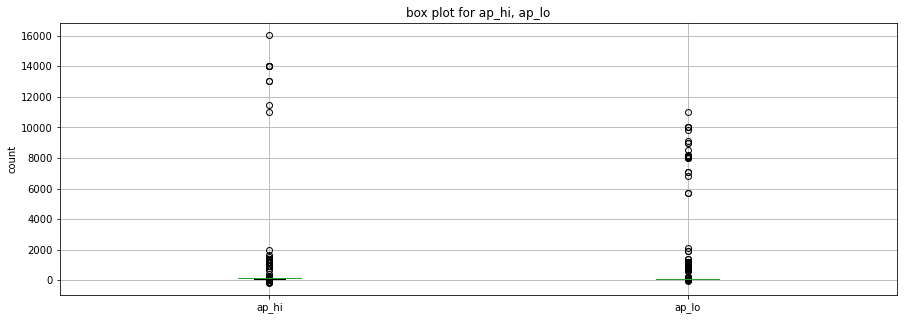

In [6]:
#box plot that shows the outliers for ap_hi & ap_lo
plt.figure(figsize = (15, 5))
cardio_disease.boxplot(['ap_hi' ,  'ap_lo'])
plt.title("box plot for ap_hi, ap_lo")
plt.ylabel("count")
plt.show


In [7]:
#According to the above we can check for the outliers if any present in those both columns#
outlier_values_Bp = len(cardio_disease[(cardio_disease["ap_hi"] >= 300) | (cardio_disease["ap_lo"] >= 200) | (cardio_disease["ap_hi"] <= 0) | (cardio_disease["ap_lo"] <= 0) | (cardio_disease['ap_hi'] < cardio_disease['ap_lo'])])
print("The number of outlier values in Blood presuure values is :", outlier_values_Bp)
percentage_of_outlier_values = np.round((outlier_values_Bp/len(cardio_disease)*100), 2)
print("The percentage of outlier values in the dataset for both Blood pressures is:", percentage_of_outlier_values)

The number of outlier values in Blood presuure values is : 1289
The percentage of outlier values in the dataset for both Blood pressures is: 1.84


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68723 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68723 non-null  int64  
 1   age          68723 non-null  int64  
 2   gender       68723 non-null  int64  
 3   height       68723 non-null  int64  
 4   weight       68723 non-null  float64
 5   ap_hi        68723 non-null  int64  
 6   ap_lo        68723 non-null  int64  
 7   cholesterol  68723 non-null  int64  
 8   gluc         68723 non-null  int64  
 9   smoke        68723 non-null  int64  
 10  alco         68723 non-null  int64  
 11  active       68723 non-null  int64  
 12  cardio       68723 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.3 MB


<function matplotlib.pyplot.show(close=None, block=None)>

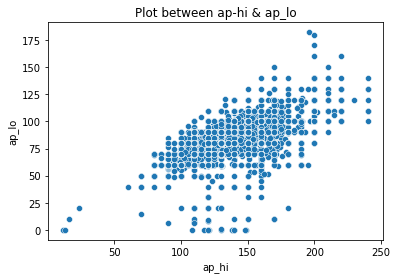

In [8]:
# since the % of outlier values is low we can directly remove them for the dataset #
cardio_disease_1 = cardio_disease.copy()
cardio_disease_1 = cardio_disease_1[(cardio_disease_1['ap_hi'] >= 0) & (cardio_disease_1["ap_lo"] >= 0)]
cardio_disease_1= cardio_disease_1[(cardio_disease_1['ap_hi'] <= 300) &(cardio_disease_1["ap_lo"] <= 200)]
cardio_disease_1 = cardio_disease_1[(cardio_disease_1['ap_hi'] > cardio_disease_1['ap_lo'])]
cardio_disease_1.info()

# we have removed the outlier values from ap_hi, ap_lo
#plotting ap_hi vs ap_lo
sns.scatterplot(x = 'ap_hi', y = 'ap_lo', data = cardio_disease_1)
plt.title("Plot between ap-hi & ap_lo")
plt.xlabel("ap_hi")
plt.ylabel("ap_lo")
plt.show


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


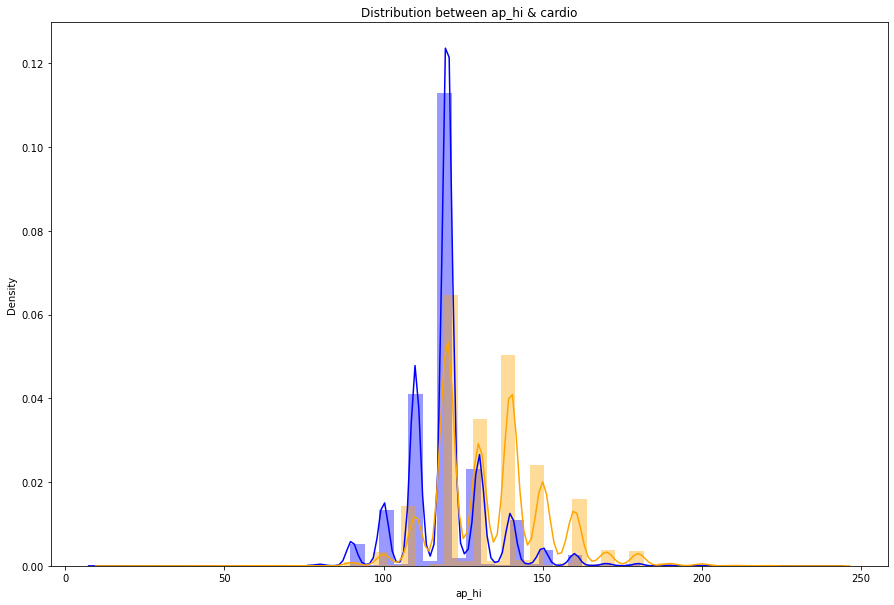

In [9]:
# distribution of the ap_hi according with the cardio disease
plt.figure(figsize = (15, 10))
sns.distplot(cardio_disease_1['ap_hi'][cardio_disease_1['cardio'] == 0], color = 'blue')
sns.distplot(cardio_disease_1['ap_hi'][cardio_disease_1['cardio'] == 1], color = 'orange')
plt.title("Distribution between ap_hi & cardio")
plt.show()



D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


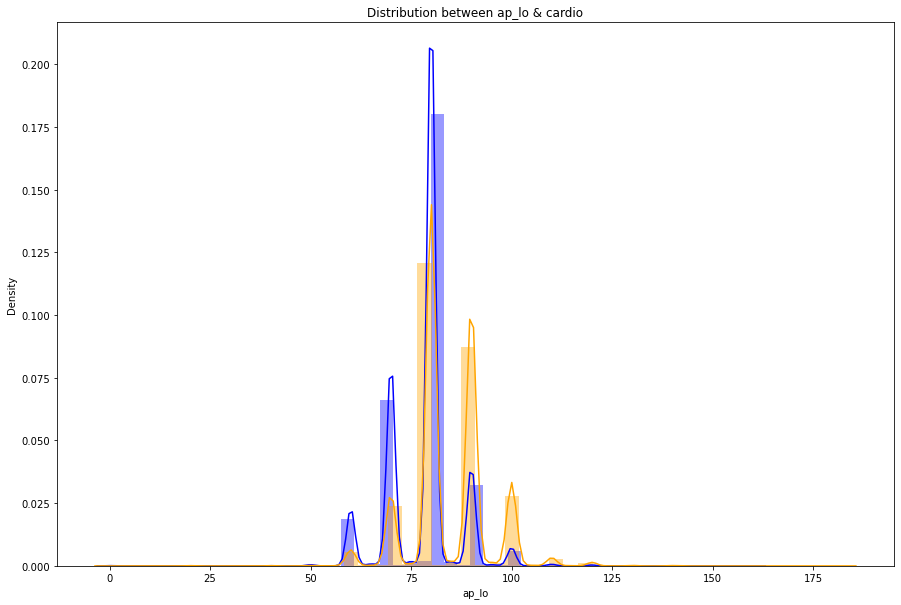

In [10]:
plt.figure(figsize = (15,10))
sns.distplot(cardio_disease_1['ap_lo'][cardio_disease_1['cardio'] == 0], color = 'blue')
sns.distplot(cardio_disease_1['ap_lo'][cardio_disease_1['cardio'] == 1], color = 'orange')
plt.title("Distribution between ap_lo & cardio")
plt.show()


From the above graphs we can see that the maximum people affected with cardio or with abnormal values i.e range between min and maximum values.

##### height and weight outliers

we have both height and weight columns, with this we can calculate the BMI(Body mass Index) value which is a key factor affecting the cardio vascular disease.  
The minimum and maximum value of bmi for a person likely to get Cardiovascular disease is 18.5 kg/sq.mts(underweight), 60 kg/sq.mts (overweight)  

                BMI = weight(kgs)/height**2

In [11]:
#calculating Bmi 
cardio_disease_1['height']= cardio_disease_1['height'].astype(float)
cardio_disease_1['bmi'] = np.round(cardio_disease_1['weight']/((cardio_disease_1['height']/100)**2), 2)
cardio_disease_1['bmi'].head()

0    21.97
1    34.93
2    23.51
3    28.71
4    23.01
Name: bmi, dtype: float64

In [12]:
# filtering the dataset and removing outliers based on the bmi max and min values:
cardio_disease_1 = cardio_disease_1[(cardio_disease_1['bmi'] < 60) & (cardio_disease_1['bmi'] > 18.5) ]
outlier_values_removed = round(70000 - len(cardio_disease_1))/70000*100
print("the total percentage of values  removed from the dataset:", outlier_values_removed)


the total percentage of values  removed from the dataset: 2.8328571428571427


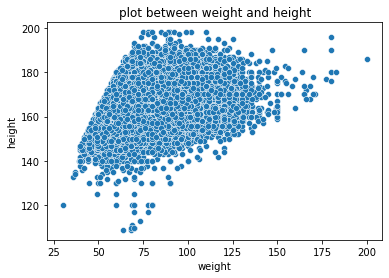

In [13]:
# plot between height and weight#
sns.scatterplot(x = 'weight', y = 'height', data = cardio_disease_1)
plt.title("plot between weight and height")

plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


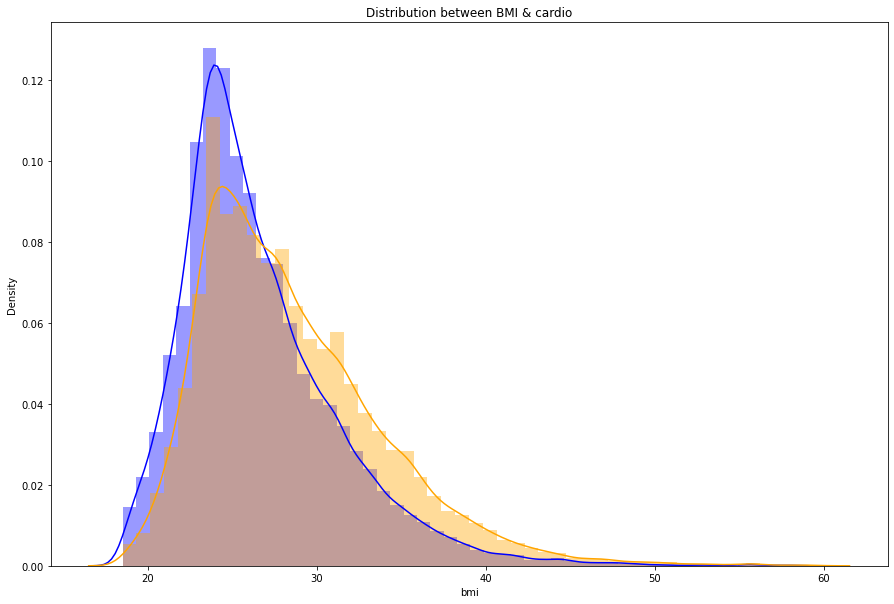

In [14]:
# distribution of BMI with cardio
plt.figure(figsize = (15, 10))
sns.distplot(cardio_disease_1['bmi'][cardio_disease_1['cardio'] == 0], color = 'blue')
sns.distplot(cardio_disease_1['bmi'][cardio_disease_1['cardio'] == 1], color = 'orange')
plt.title("Distribution between BMI & cardio")
plt.show()

Age is one of the concerning factors for the cardio vascular disease.  
It is said that as age increases the chances of getting a heat stroke(cardio vascular disease) will increase.

In [15]:
# In the data the Age is given in numbers converting the age into Years
cardio_disease_1['age'] = cardio_disease_1['age'].astype(float)
cardio_disease_1['age'] = (cardio_disease_1['age']/365).round()
# checking the relation ship between the 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


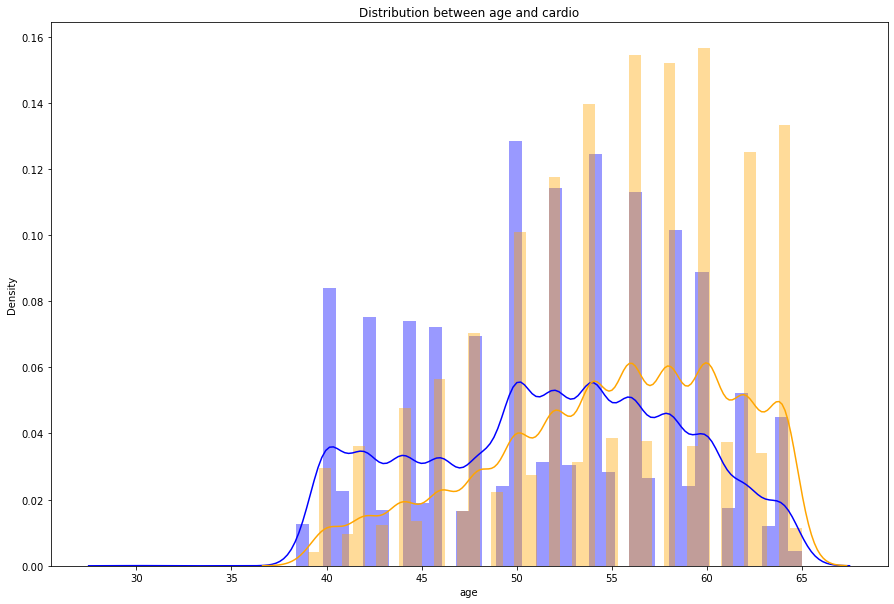

In [16]:
#Distribution of age with the cardio
plt.figure(figsize = (15, 10))
sns.distplot(cardio_disease_1['age'][cardio_disease_1['cardio'] == 0], color = 'blue')
sns.distplot(cardio_disease_1['age'][cardio_disease_1['cardio'] == 1], color = 'orange')
plt.title("Distribution between age and cardio")
plt.show()

From the above observation we can see that upon increase in age the chances of getting the cardio vascular disease is high

In [17]:
#As per the data gender is given as numerical code  1 : female and 2 : male
# checking the total number of males and females in the given data
cardio_disease_1['gender'].value_counts()


1    44286
2    23731
Name: gender, dtype: int64

According to the given data the % of most of the persons is female rather than the male and it is obvious that according to this data more affected with the cardio disease is female persons


In [18]:
# checking the other categorical variables wihch are given as numerical variables or binary codes
print("The number of each categories in cholesterol")
display(cardio_disease_1['cholesterol'].value_counts())
print("The number of each categories in glucose")
display(cardio_disease_1['gluc'].value_counts())
print("The number of each categories in smoke")
display(cardio_disease_1['smoke'].value_counts())
print("The number of each categories in alco")
display(cardio_disease_1['alco'].value_counts())
print("The number of categories in active")
display(cardio_disease_1['active'].value_counts())


The number of each categories in cholesterol


1    50952
2     9226
3     7839
Name: cholesterol, dtype: int64

The number of each categories in glucose


1    57797
3     5195
2     5025
Name: gluc, dtype: int64

The number of each categories in smoke


0    62052
1     5965
Name: smoke, dtype: int64

The number of each categories in alco


0    64387
1     3630
Name: alco, dtype: int64

The number of categories in active


1    54619
0    13398
Name: active, dtype: int64

Usually the cardio vasular disease will be dependent on the above varibales glucose , cholesterol percentage, alchol intake, smoking and physical activity but the data in the dataset is like skewed so according to this data the cardio is not much dependent upon these values the same can be observed in the correlation plot.



In [19]:
#dropping the unnecessary columns like id , height, and weight
dropped_cols = ['id', 'height', 'weight']
cardio_disease_1 = cardio_disease_1.drop(dropped_cols, axis = 1)
cardio_disease_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68017 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68017 non-null  float64
 1   gender       68017 non-null  int64  
 2   ap_hi        68017 non-null  int64  
 3   ap_lo        68017 non-null  int64  
 4   cholesterol  68017 non-null  int64  
 5   gluc         68017 non-null  int64  
 6   smoke        68017 non-null  int64  
 7   alco         68017 non-null  int64  
 8   active       68017 non-null  int64  
 9   cardio       68017 non-null  int64  
 10  bmi          68017 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 6.2 MB


In [20]:
#correltion between each column
cardio_disease_1.describe()


,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68017.000000,68017.000000,68017.000000,68017.000000,68017.000000,68017.000000,68017.000000,68017.000000,68017.00000,68017.000000,68017.000000
mean,53.345811,1.348898,126.768734,81.312951,1.366144,1.226635,0.087699,0.053369,0.80302,0.496788,27.541238
std,6.758224,0.476625,16.683540,9.614005,0.680140,0.572741,0.282858,0.224770,0.39772,0.499993,5.141673
min,30.000000,1.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,18.510000
25%,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,23.880000
50%,54.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,26.400000
75%,58.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000,30.180000
max,65.000000,2.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000,59.520000


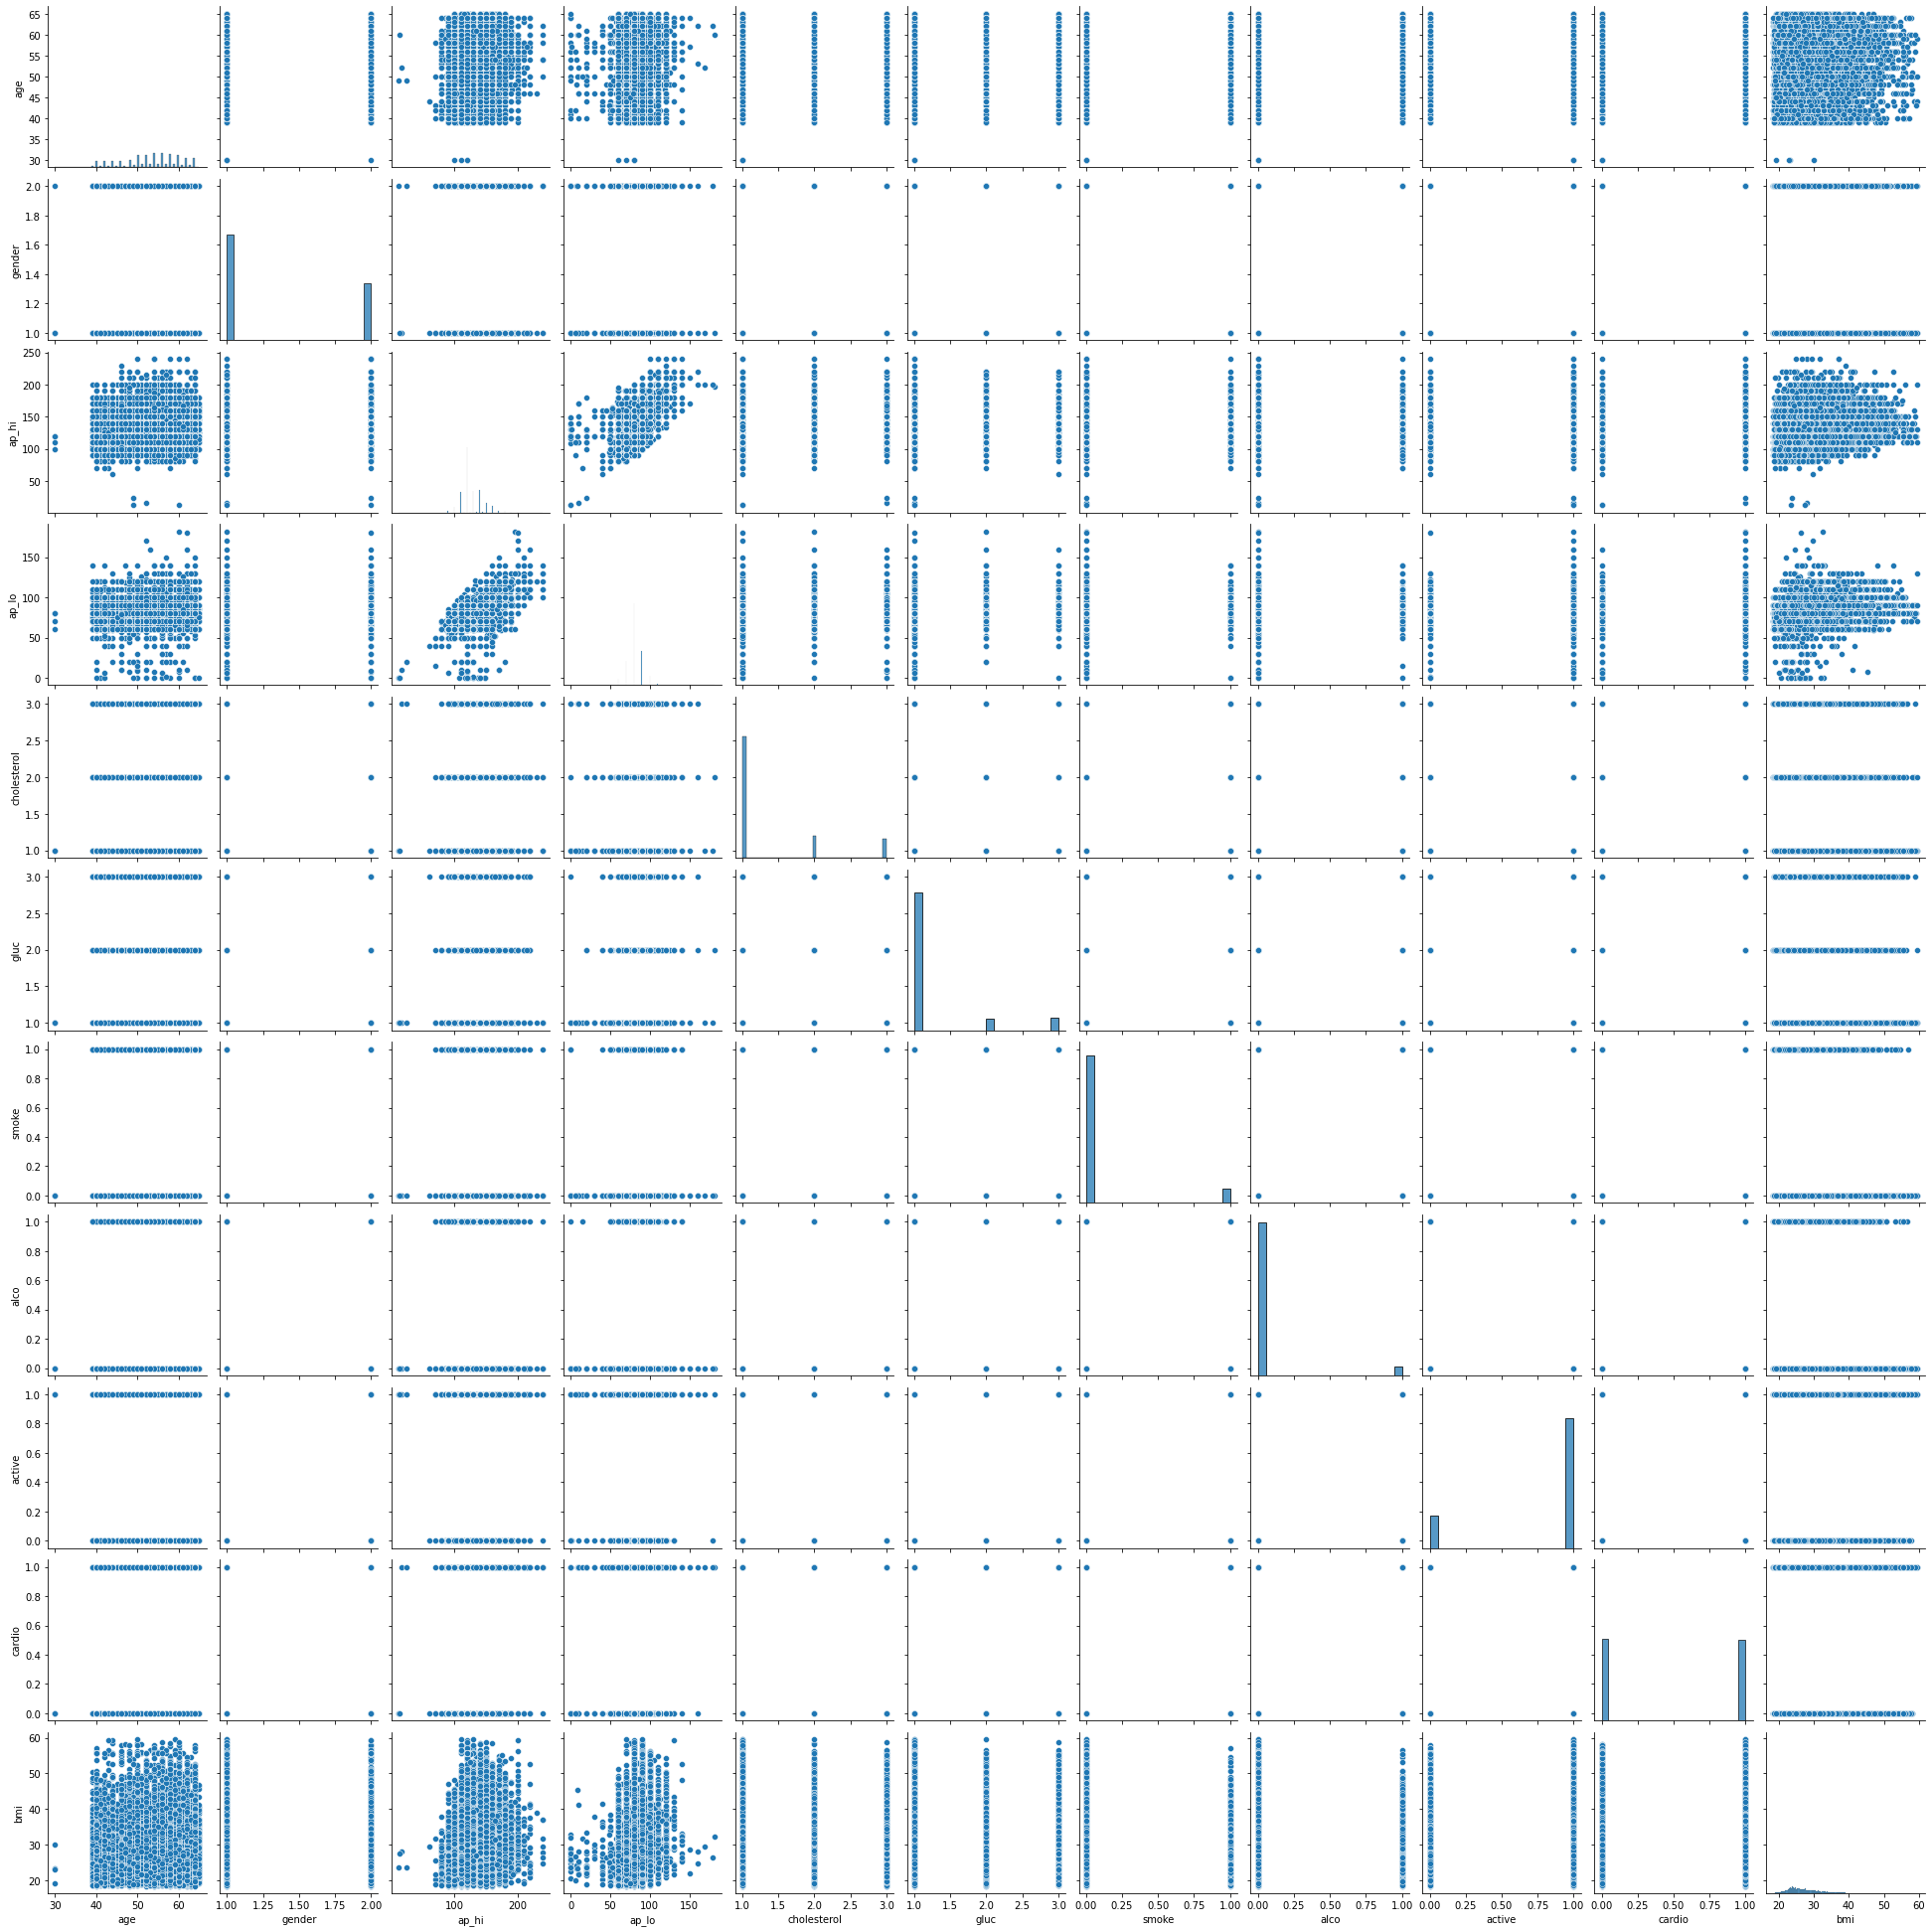

In [21]:
sns.pairplot(cardio_disease_1)

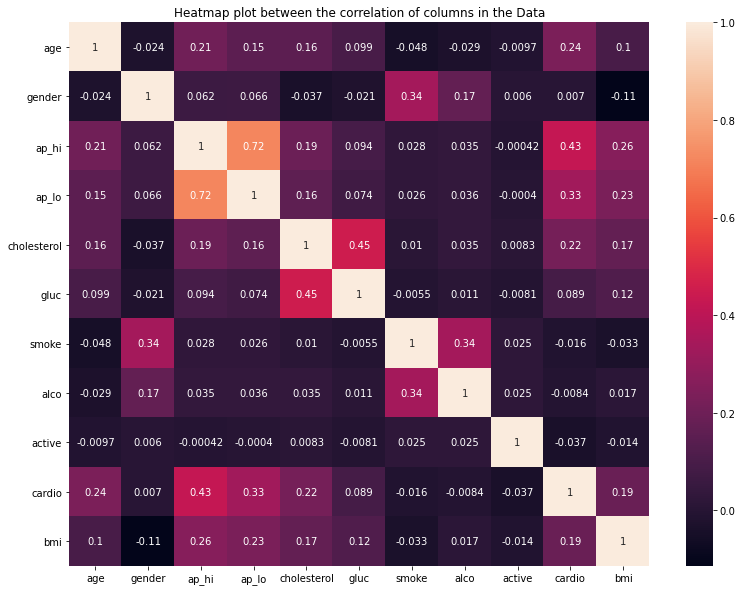

In [22]:
#correlation plot
plt.figure(figsize = (13, 10))
sns.heatmap(cardio_disease_1.corr(), annot = True)
plt.title("Heatmap plot between the correlation of columns in the Data")
plt.show()

from the above heatmap we can see that the most concerning feature is ap_hi, ap_lo, age, Bmi 

ML- models:

i am using different machine learning algorithms to predict the existence of cardiovascular diseases in patient according to our dataset
1. Decision tree
2. Random forest
3. K - nearest Neighbour
4. SVM

In [61]:
# Train test split:
#Seperating the training and test sets 
X = cardio_disease_1.drop(['cardio'], axis = 1) # Input variables
y = cardio_disease_1['cardio'] # target variables

# here i am splitting the dataset in the 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =2)

# the shape of the train and test arrays#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(54413, 10)
(54413,)
(13604, 10)
(13604,)


###### 1 Decision Tree

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      6935
           1       0.63      0.62      0.63      6669

    accuracy                           0.64     13604
   macro avg       0.64      0.64      0.64     13604
weighted avg       0.64      0.64      0.64     13604

The sensitivity of the model using Decision tree is: 0.617633828160144
The accuracy of Decision Tree is : 0.64


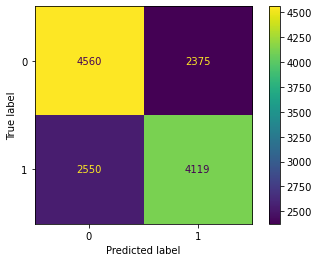

In [62]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

#metrics calculation:
print(metrics.classification_report(y_test, y_pred)) # classification report 

#confusion metrics:
confusion_matrix_dt = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(decision_tree, X_test, y_test)

#sensitivity 
sensitivity_dt = confusion_matrix_dt[1,1]/(confusion_matrix_dt[1,0] + confusion_matrix_dt[1,1])
print("The sensitivity of the model using Decision tree is:", sensitivity_dt)
accuracy_dt = print("The accuracy of Decision Tree is :", np.round(metrics.accuracy_score(y_test, y_pred), 2)) # accuracy




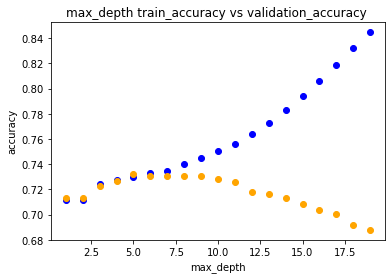

In [63]:
#By changing the parameters to the best parameters we can increase the accuracy and the sensitivtity of the above model
# tuning max_depth hyperparamter 
train_accuracy_dt = []
validation_accuracy_dt = []
for i in range(1, 20):
    model = DecisionTreeClassifier(max_depth = i, random_state = 5)
    model.fit(X_train, y_train)
    train_accuracy_dt.append(model.score(X_train, y_train))
    validation_accuracy_dt.append(model.score(X_test, y_test))

#plot between the values #
plt.scatter(range(1, 20), train_accuracy_dt, color = 'blue')
plt.scatter(range(1, 20), validation_accuracy_dt, color = 'orange')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("max_depth train_accuracy vs validation_accuracy ")
plt.show()



[0.7269034973260067, 0.7275283480050723, 0.729880727032143, 0.7304871997500597, 0.7312958300406153, 0.7325822873210446, 0.7333174057670042, 0.733703342951133, 0.7339422564460699, 0.7339973903295168, 0.7351919578042012, 0.735706540716373, 0.7358168084832669, 0.7359454542113097, 0.7363313913954386, 0.7364784150846305, 0.7366070608126735, 0.7368092183853123]
[0.7247868274037048, 0.7265510144075272, 0.7316230520435166, 0.7336077624228168, 0.7325786533372537, 0.7316230520435166, 0.7321376065862981, 0.7326521611290797, 0.7327256689209056, 0.7325786533372537, 0.732358129961776, 0.732211114378124, 0.7316230520435166, 0.7313290208762129, 0.7314760364598647, 0.7314025286680388, 0.731182005292561, 0.7305204351661276]


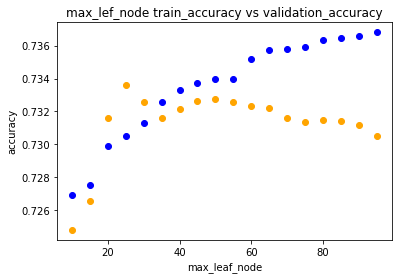

In [64]:
# tuning max_leaf_node parameter
train_accuracy_dt1 = []
validation_accuracy_dt1 = []
for j in range(10, 100, 5):
    model = DecisionTreeClassifier(max_leaf_nodes = j , random_state = 5)
    model.fit(X_train, y_train)
    train_accuracy_dt1.append(model.score(X_train, y_train))
    validation_accuracy_dt1.append(model.score(X_test, y_test))
print(train_accuracy_dt1)
print(validation_accuracy_dt1)
#plot between the values #
plt.scatter(range(10,100, 5), train_accuracy_dt1, color = 'blue')
plt.scatter(range(10, 100, 5), validation_accuracy_dt1, color = 'orange')
plt.xlabel('max_leaf_node')
plt.ylabel('accuracy')
plt.title("max_lef_node train_accuracy vs validation_accuracy")
plt.show()

if we check the both graphs for max_leaf_node and max_depth values the max_depth = 5 , max_leaf_node = 25 these points where the train accuracy is incresing 
and validation accuracy is decreasing so we can use these tuned values in order to get the improved accuracy for the Decision tree model

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      6935
           1       0.78      0.63      0.70      6669

    accuracy                           0.73     13604
   macro avg       0.74      0.73      0.73     13604
weighted avg       0.74      0.73      0.73     13604

The sensitivity of the model using Decision tree is: 0.617633828160144
The accuracy of Decision Tree is : 0.7325051455454278


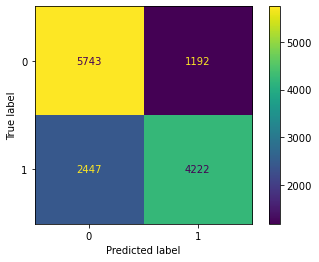

In [70]:
decision_tree_tuned = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 25,random_state=2 )
decision_tree_tuned.fit(X_train, y_train)
y_pred = decision_tree_tuned.predict(X_test)

#metrics calculation:
print(metrics.classification_report(y_test, y_pred)) # classification report 

#confusion metrics:
confusion_matrix_dt_tuned = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(decision_tree_tuned, X_test, y_test)

#sensitivity 
sensitivity_dt_tuned = confusion_matrix_dt_tuned[1,1]/(confusion_matrix_dt_tuned[1,0] + confusion_matrix_dt_tuned[1,1])
print("The sensitivity of the model using Decision tree is:", sensitivity_dt)
accuracy_dt_tuned = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of Decision Tree is :", accuracy_dt_tuned) # accuracy

# by comparing the both models after tuning the accuracy is very much improved

In [28]:
#features of importance 
x_names = cardio_disease_1.columns.tolist()
x_names.remove('cardio')
y_names = ['No', 'Yes']
feature_importance = {}
for i, name in enumerate(x_names):
    feature_importance.update({name:decision_tree_tuned.feature_importances_[i]})

sorted_order = dict(sorted(feature_importance.items(), key = lambda x:x[1], reverse = True))
print("The important features in the dataset are:")
for k in sorted_order:    
    print(k)




The important features in the dataset are:
ap_hi
age
cholesterol
bmi
gluc
ap_lo
active
gender
smoke
alco


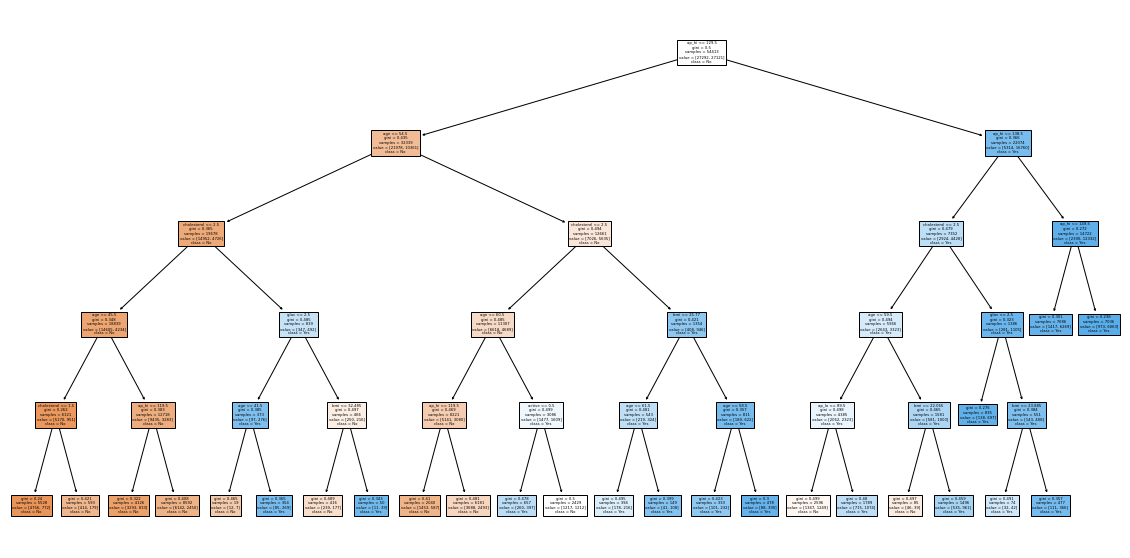

In [29]:
from sklearn import tree
figure = plt.figure(figsize = (20,10))
_ = tree.plot_tree(decision_tree_tuned, feature_names = x_names, class_names = y_names, filled = True )

###### Random forest

The accuracy of the Random forest classifier is: 0.6840635107321376
The sensitivity of the Random forest classifier is : 0.6905083220872694


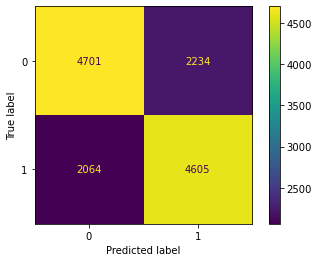

In [30]:
random_forest = RandomForestClassifier(random_state = 5, n_estimators = 100, bootstrap=True, max_features = 'auto', oob_score=True)
predict = random_forest.fit(X_train, y_train)
y_pred = predict.predict(X_test)

#metrics:
confusion_metrics_rf = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(random_forest, X_test, y_test)

#Sensitivity & Accuracy:
accuracy_rfc = metrics.accuracy_score(y_test, y_pred)
sensitivity_rfc = confusion_metrics_rf[1,1]/(confusion_metrics_rf[1,1]+confusion_metrics_rf[1,0])
print("The accuracy of the Random forest classifier is:", accuracy_rfc)
print("The sensitivity of the Random forest classifier is :", sensitivity_rfc)

###### Tuned random forest for best paramters

In [35]:
#tuning for best paramters #
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
estimators = {'n_estimators' : [500], 'max_features' :['sqrt'], 'max_depth':[20], 'max_leaf_nodes':[500,1000,1500]}
random_forest_classifier_tuned = GridSearchCV(estimator = RandomForestClassifier(), param_grid=estimators, cv=5, scoring =['accuracy', 'recall'], refit = 'accuracy').fit(X_train, y_train)
print(random_forest_classifier_tuned.best_estimator_)
param_selection = random_forest_classifier_tuned.cv_results_['params']
for i in param_selection:
    print(i)




RandomForestClassifier(max_depth=20, max_features='sqrt', max_leaf_nodes=500,
                       n_estimators=500)
{'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 500, 'n_estimators': 500}
{'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 1000, 'n_estimators': 500}
{'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 1500, 'n_estimators': 500}


The accuracy of the Random forest classifier is: 0.7340488091737725
The sensitivity of the Random forest classifier is : 0.6905083220872694


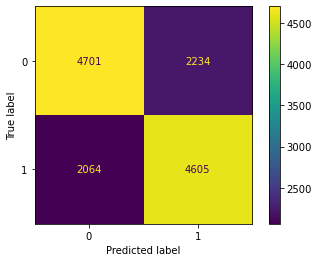

In [37]:
#tuned Random forest :
random_forest_tuned = RandomForestClassifier(random_state = 5, n_estimators = 500, bootstrap=True, max_features = 'sqrt',
                                             max_depth = 20, max_leaf_nodes = 1000, oob_score=True)
predict = random_forest_tuned.fit(X_train, y_train)
y_pred = predict.predict(X_test)

#metrics:
confusion_metrics_rf_tuned = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(random_forest, X_test, y_test)

#Sensitivity & Accuracy:
accuracy_rfc_tuned = metrics.accuracy_score(y_test, y_pred)
sensitivity_rfc_tuned = confusion_metrics_rf_tuned[1,1]/(confusion_metrics_rf_tuned[1,1]+confusion_metrics_rf_tuned[1,0])
print("The accuracy of the Random forest classifier is:", accuracy_rfc_tuned)
print("The sensitivity of the Random forest classifier is :", sensitivity_rfc_tuned)

In [ ]:
for i, name in enumerate(x_names):
    feature_importance.update({name:random_forest_tuned.feature_importances_[i]})

sorted_order = dict(sorted(feature_importance.items(), key = lambda x:x[1], reverse = True))
print("The important features in the dataset are:")
for k in sorted_order:    
    print(k)

#### Standadized Scalar technique for SVM and KNN models 

In [39]:
#scaling the train, test dataset for KNN and SVM algorithms
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### k-NearstNeighbor

In [45]:
#K- nearest Neighbour:
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"KNN accuracy with k: {k}, {score:.2f}")   
#upon running randomly with different K values the accuracy is constant after K = 21 so we can take K = 21 and consider the accuracy


KNN accuracy with k: 1, 0.64
KNN accuracy with k: 2, 0.65
KNN accuracy with k: 3, 0.68
KNN accuracy with k: 4, 0.68
KNN accuracy with k: 5, 0.69
KNN accuracy with k: 6, 0.70
KNN accuracy with k: 7, 0.71
KNN accuracy with k: 8, 0.70
KNN accuracy with k: 9, 0.71
KNN accuracy with k: 10, 0.71
KNN accuracy with k: 11, 0.72
KNN accuracy with k: 12, 0.72
KNN accuracy with k: 13, 0.72
KNN accuracy with k: 14, 0.72
KNN accuracy with k: 15, 0.72
KNN accuracy with k: 16, 0.72
KNN accuracy with k: 17, 0.72
KNN accuracy with k: 18, 0.73
KNN accuracy with k: 19, 0.72
KNN accuracy with k: 20, 0.72
KNN accuracy with k: 21, 0.73
KNN accuracy with k: 22, 0.73
KNN accuracy with k: 23, 0.73
KNN accuracy with k: 24, 0.73
KNN accuracy with k: 25, 0.73
KNN accuracy with k: 26, 0.73
KNN accuracy with k: 27, 0.73
KNN accuracy with k: 28, 0.73
KNN accuracy with k: 29, 0.73
KNN accuracy with k: 30, 0.73
KNN accuracy with k: 31, 0.73
KNN accuracy with k: 32, 0.73
KNN accuracy with k: 33, 0.73
KNN accuracy with k

KNN accuracy with k = 21: 0.73
KNN sensitivity with k = 21: 0.73


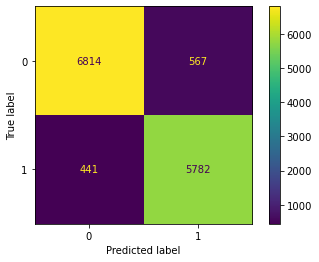

In [46]:
#Knn with K =21:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)

#confuion matrix
confusion_matrix_knn = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(knn, X_test, y_pred)

#accuracy and sensivity
print(f"KNN accuracy with k = 21: {score:.2f}")
sensitivity_knn = confusion_matrix_knn[1,1]/(confusion_matrix_knn[1,1] + confusion_matrix_knn[1,0])
print(f"KNN sensitivity with k = 21: {score:.2f}")


#### Tuned KNN 

In [47]:
#tuned KNN 
values = []
for i in range(1, 40):
    values.append(i)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': values, 'weights': ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv =5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)


{'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'uniform'}


In [50]:
#running with the best parameters obtained from grid search CV 
knn_tuned = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

#confusion matrix
confusion_matrix_knn_tuned = metrics.confusion_matrix(y_test, y_pred)
#metrics.plot_confusion_matrix(knn_tuned, X_test, y_pred)

#Accuracy and sensitivity:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("KNN accuracy with tuned paramteres", accuracy)
sensitivity_knn_tuned = confusion_matrix_knn_tuned[1,1]/(confusion_matrix_knn_tuned[1,1] + confusion_matrix_knn_tuned[1,0])
print(f"KNN sensitivity with tuned parameters:", sensitivity_knn_tuned)


KNN accuracy with tuned paramteres 0.6931049691267275
KNN sensitivity with tuned parameters: 0.6819613135402609


##### support vector machine

the accuracy with svm: 0.7352249338429874
the sensitivty with SVM is 0.6768630979157295


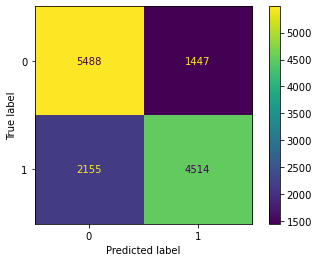

In [55]:
#suport vector machine classifier
svm_clf = svm.SVC(kernel = 'rbf')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

#confusion matrix:
confusion_matrix_svm = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(svm_clf, X_test, y_test)

#Accuracy:
accuracy = metrics.accuracy_score(y_pred, y_test)
print("the accuracy with svm:",accuracy)
#sensitivity:
sensitivity_svm = confusion_matrix_svm[1,1]/(confusion_matrix_svm[1,0]+ confusion_matrix_svm[1,1])
print("the sensitivty with SVM is", sensitivity_svm)


#### Conclusion

In [71]:
# comapring the all 4 machine learning algorithms accuracy 
results = pd.DataFrame({'ML-Model' : ['Decision tree', 'Random forest', 'K-NearestNeighbor', 'Svm(Support vector machine)'],
                        'Accuracy':[accuracy_dt_tuned,accuracy_rfc_tuned, score, accuracy],
                       'Sensitivity': [sensitivity_dt_tuned, sensitivity_rfc_tuned, sensitivity_knn, sensitivity_svm]})
results

,ML-Model,Accuracy,Sensitivity
0,Decision tree,0.732505,0.633078
1,Random forest,0.734049,0.690508
2,K-NearestNeighbor,0.726110,0.695307
3,Svm(Support vector machine),0.735225,0.676863


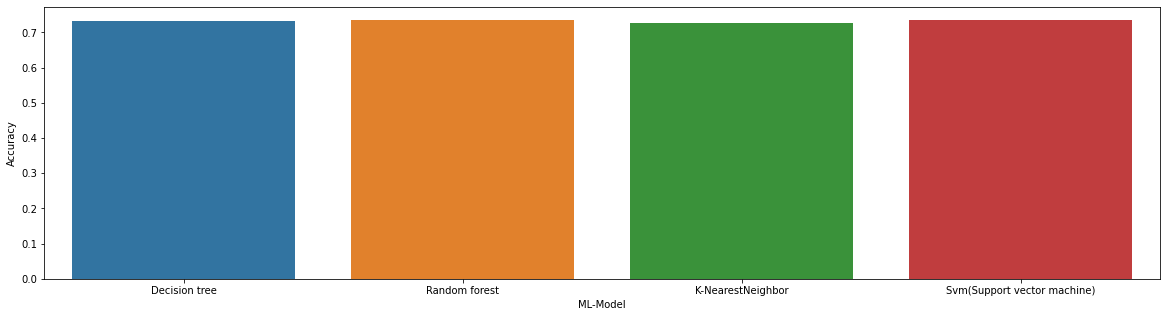

In [73]:
#plotting the results for different models with different accuracies
plt.figure(figsize =(15,5))
sns.barplot(y= results['Accuracy'], x = results['ML-Model'], orient = 'v')
plt.show()

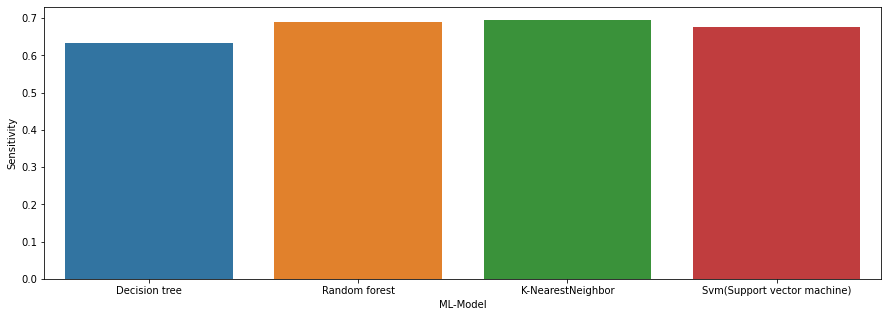

In [75]:
#plotting the sensitivity of different models#
plt.figure(figsize = (15,5))
sns.barplot(y = results['Sensitivity'], x = results['ML-Model'], orient = "v")
plt.show()

By the above we can conclude that all the models aftr tuning are perfomed well and have almost same accuracy.
The sensitivity is changing for each but the accuracy is almost same for each algorithm.


### Future Refrence
If we can able to train this kind of real-time data we can implement an Application or web browser where we can deploy our model and based on the input values of the people it can predict weather the person is suffering from cardio vascular disease or not.